## Assignment 1a

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline
import scipy as sp        
import scipy.constants as spc
import os      
import sys
sys.path.append('modules')
sys.path
import pandas as pd

import target_model
import My_Radar_Inputs
import Scheduler
import Helper
import Detection
import Is_It_In_Beam
import logging_radar

isItInBeam = Is_It_In_Beam.IsInBeam()
help = Helper.Helper()
ri = My_Radar_Inputs.RadarInputs()
log = logging_radar.Logging('logFile', help)



In [2]:
data = np.loadtxt('test_trajectory.txt')
tar = target_model.Target('test_trajectory.txt')


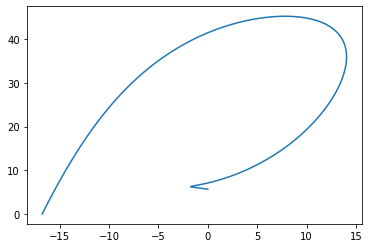

In [3]:
help = Helper.Helper()
help.ENU(data)
help.ENU2RAE()
plt.plot(help.azimuth, help.elevation)

## Assignment 1b

In [4]:
ant = Scheduler.Antenna(ri.Wavelength, ri.AntennaWidth, ri.AntennaHeight)
sch = Scheduler.Scheduler(ant, np.min(help.elevation), np.max(help.elevation), np.min(help.azimuth), np.max(help.azimuth))

In [5]:
for Index in np.arange(100): 
    GetNextPoint = sch.GetNextPoint(False)

In [6]:
time = 0.01 * np.arange(0,20000)     # 0 to 200 seconds
for t in time:
    ## get target state at time t
    targetState = tar.GetState(t)      #first value is t value, 2nd is the time it interpolated at that t value?
    targetPos = targetState[2:5]  # slice 2-5 so we start at 2 and want it to give us 3. 
    (boresightAzimuth, boresightElevation) = sch.GetNextPoint(False)
    if isItInBeam.IsTargetInBeam(boresightAzimuth, boresightElevation, sch.beamAzimuthDefractionAngle_rad, sch.beamElevationDefractionAngle_rad, targetPos):
        print("Target is in beam at time: {}". format(t))

Target is in beam at time: 0.64
Target is in beam at time: 2.14
Target is in beam at time: 3.64
Target is in beam at time: 5.14
Target is in beam at time: 26.14
Target is in beam at time: 27.64
Target is in beam at time: 29.14
Target is in beam at time: 30.64
Target is in beam at time: 32.14
Target is in beam at time: 33.64
Target is in beam at time: 35.14
Target is in beam at time: 36.64
Target is in beam at time: 38.14
Target is in beam at time: 56.370000000000005
Target is in beam at time: 57.870000000000005
Target is in beam at time: 59.370000000000005
Target is in beam at time: 60.870000000000005
Target is in beam at time: 62.370000000000005
Target is in beam at time: 80.71000000000001
Target is in beam at time: 82.21000000000001
Target is in beam at time: 83.71000000000001
Target is in beam at time: 85.21000000000001
Target is in beam at time: 86.82000000000001
Target is in beam at time: 88.32000000000001
Target is in beam at time: 89.82000000000001
Target is in beam at time: 91.

## Assignment 2

In [7]:
rf = Detection.RadarFormulas(ri)
det = Detection.Detection(ri, help)

## Assignment 3

In [8]:
# SNRVector = []
# TargetRangeVector = []
# ProbOfDetecVector = []
# for t in time:
#     ## get target state at time t
#     targetState = tar.GetState(t)      #first value is t value, 2nd is the time it interpolated at that t value?
#     targetPos = targetState[2:5]  # slice 2-5 so we start at 2 and want it to give us 3. 
    
#     targetRange = help.GetRange(targetPos)
#     SNR = rf.SNR(targetRange)
#     probDet = det.GetProbOfDetection(SNR)

#     SNRVector.append(SNR)
#     TargetRangeVector.append(targetRange)
#     ProbOfDetecVector.append(probDet)
    
# TargetRangeVectorDivided = [x/1000 for x in TargetRangeVector]

In [9]:
# ## initialize target model
# fig = plt.figure();
# ax  = fig.add_axes([0,0,1,1])
# ax.plot(TargetRangeVectorDivided,SNRVector)
# plt.ylim((0,100))
# ax.set_ylabel('SNR')
# ax.set_xlabel('Range (km)')

# fig1 = plt.figure();
# ax1  = fig1.add_axes([0,0,1,1])
# ax1.plot(TargetRangeVectorDivided,ProbOfDetecVector)
# plt.xlim((0,50))
# ax1.set_ylabel('Prob of Detection')
# ax1.set_xlabel('Range (km)')

# fig2 = plt.figure();
# ax2  = fig2.add_axes([0,0,1,1])
# ax2.plot(SNRVector,ProbOfDetecVector)
# plt.xlim((0,40))
# ax2.set_xlabel('SNR')
# ax2.set_ylabel('Prob of Detection')

# Final Simulation

In [74]:
    #time = 0.01 * np.arange(0,20000) # seconds

    endtime = 200
    t = 0
    updateTime = 0.01
    targetRangeVector = np.empty((0,))
    snrVect = np.empty((0,))
    podVect = np.empty((0,))
    detVect = np.empty((0,))

    while t < endtime:

        t = t + updateTime
        # Get next Boresight

        (boresightAzimuth_rad, boresightElevation_rad) = sch.GetNextPoint(False)
        boresightAzimuth_deg = np.rad2deg(boresightAzimuth_rad)
        boresightElevation_deg = np.rad2deg(boresightElevation_rad)
        boresightAzimuth = np.deg2rad(boresightAzimuth_deg)
        boresightElevation = np.deg2rad(boresightElevation_deg)
        # print("Radar is searching Az: {}, El: {} at time: {}".format(boresightAzimuth_deg,boresightElevation_deg,t))

        # get target state at time t
        targetState = tar.GetState(t)
        targetPos = targetState[2:5]
        targetRange = help.GetRange(targetPos)
        targetRangeVector = np.append(targetRangeVector,targetRange)

        # #testing 
        # targetPosRAE = help.convertENU2RAE1d(targetPos)
        # targetAz = targetPosRAE[1]
        # targetAz_rad = np.deg2rad(targetAz)
        # targetEl = targetPosRAE[2]
        # targetEl_rad = np.deg2rad(targetEl)
        # isInBeamTruth = isItInBeam.IsTargetInBeam(targetAz_rad, targetEl_rad, sch.beamAzimuthDefractionAngle_rad, sch.beamElevationDefractionAngle_rad, targetPos)

        # Check if target is in beam and get
        isInBeamTruth = isItInBeam.IsTargetInBeam(boresightAzimuth, boresightElevation, sch.beamAzimuthDefractionAngle_rad, sch.beamElevationDefractionAngle_rad, targetPos)

        # print(boresightAzimuth, boresightElevation, sch.beamAzimuthDefractionAngle_rad, sch.beamElevationDefractionAngle_rad)

        rf.TargetRange()
        isInRangeTruth = isItInBeam.IsTargetInRange(targetRange, rf.RangeMinimum,rf.RangeMaximum)
        # print(targetRange, rf.RangeMinimum,rf.RangeMaximum)
        # get SNR
        # is Det?
        snr = rf.SNR(targetRange)
        snrVect = np.append(snrVect,snr)
                # get POD
        probOfDet = det.GetProbOfDetection(snr)
        podVect = np.append(podVect,probOfDet)

        if isInBeamTruth & isInRangeTruth: 
            # print("isInBeamTruth: {}, isInRangeTruth: {}, at time: {}".format(isInBeamTruth,isInRangeTruth,t))
            # Is target detected? 
            isDet = det.IsDetected(probOfDet)
            detVect = np.append(detVect,isDet)

            if isDet: 
                measurement = det.GenerateMeasurement(targetPos)
                log.LogDetection(t, measurement, snr, probOfDet, targetPos)
                print("Radar detected target at time : {} and Range: {}".format(t,targetRange))
            else:
                log.LogMiss(t, snr, probOfDet, targetPos)
                print("Radar missed target at time : {} and Range: {}".format(t,targetRange))

        else:    ####### Target is not in beam
            # Check for False detection
            # print("isInBeamTruth: {}, isInRangeTruth: {}, at time: {}".format(isInBeamTruth,isInRangeTruth,t))
            isFalseDetection = det.IsDetected(ri.ProbabilityOfFalse_Alarm)
            if isFalseDetection:
                measurement = det.GenerateMeasurement(targetPos)
                print("FALSE DETECTION at time : {} and Range: {}".format(t,targetRange))
                log.LogFalseAlarm(t, measurement, snr, probOfDet, targetPos)
            else:
                pass 


        log.WriteLog()
        


Radar missed target at time : 0.45000000000000023 and Range: 50074.946081924376
Radar missed target at time : 1.9500000000000015 and Range: 49505.87776945143
Radar missed target at time : 3.4499999999999704 and Range: 48954.696698825835
Radar missed target at time : 4.949999999999939 and Range: 48420.02890981524
Radar missed target at time : 25.950000000001257 and Range: 42151.44214446708
Radar missed target at time : 27.45000000000149 and Range: 41766.04458489025
Radar missed target at time : 28.950000000001726 and Range: 41386.79041269857
Radar missed target at time : 30.45000000000196 and Range: 41013.40959525475
Radar missed target at time : 31.950000000002195 and Range: 40645.65362026495
Radar missed target at time : 33.450000000001914 and Range: 40283.29384653641
Radar missed target at time : 34.950000000001616 and Range: 39926.120377686355
Radar missed target at time : 36.45000000000132 and Range: 39573.94022563155
Radar missed target at time : 37.95000000000102 and Range: 39226

In [76]:
num=7
df = pd.read_csv('logFile', sep = ' ',names = ['loggingType','time','azimuthMeasurement','elevationMeasurement','rangeMeasurement','eastMeasurement','northMeasurement','upMeasurement','snr','probOfDet','azimuthTarget','elevationTarget','rangeTarget','eastTarget','northTarget','upTarget'])
df['sample'] = num
df.to_csv('simrun'+str(num)+'.csv')    